LAND SUBMERGE ANALYSIS


In [ ]:
import pandas as pd  
mydata = pd.read_csv("global temp.csv") 
mydata

YEAR  TempAnomalies  LandTempAaomalies  OceanTempAnomalies
0    1851          -0.15              -0.37               -0.05
1    1852          -0.09              -0.28               -0.01
2    1853          -0.08              -0.42                0.06
3    1854          -0.13              -0.39               -0.01
4    1855          -0.10              -0.30               -0.01
..    ...            ...                ...                 ...
168  2019           0.89               1.33                0.68
169  2020           1.02               1.58                0.76
170  2021           0.92               1.48                0.66
171  2022           0.91               1.47                0.65
172  2023           0.92               1.46                0.68

[173 rows x 4 columns]

Index(['TempAnomalies', 'LandTempAaomalies', 'OceanTempAnomalies'], dtype='object')


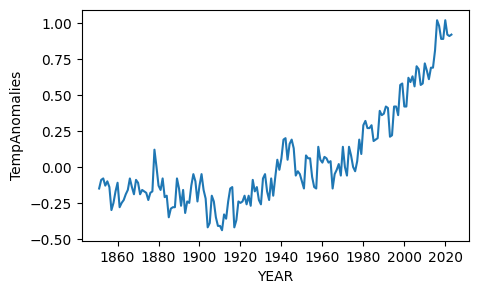

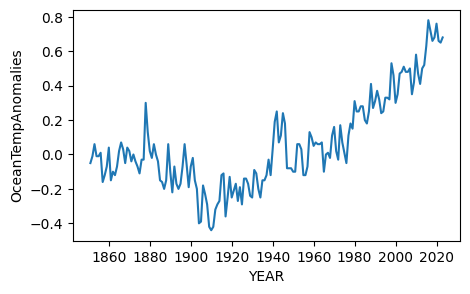

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load time series data
data = pd.read_csv("global temp.csv", parse_dates=['YEAR'], index_col='YEAR')
print(data.columns)

# Visualize time series
plt.figure(figsize=(5,3))
plt.plot(data.TempAnomalies)
plt.xlabel('YEAR')
plt.ylabel('TempAnomalies')
plt.show()

plt.figure(figsize=(5,3))
plt.plot(data.LandTempAaomalies)
plt.xlabel('YEAR')
plt.ylabel('LandTempAaomalies')
plt.show()

plt.figure(figsize=(5,3))
plt.plot(data.OceanTempAnomalies)
plt.xlabel('YEAR')
plt.ylabel('OceanTempAnomalies')
plt.show()

In [ ]:
import pandas as pd  
mydata = pd.read_csv("global glaciermb.csv") 
mydata

YEAR  ANNUAL_BALANCE          ELA        AAR
0    1919     -211.000000  2785.000000  45.000000
1    1920       33.000000  2705.000000  64.000000
2    1921    -2354.000000  3065.000000   0.000000
3    1922       74.000000  2695.000000  67.000000
4    1923     -149.000000  2755.000000  51.000000
..    ...             ...          ...        ...
98   2017     -941.836735  1804.163265  29.975000
99   2018    -1215.183673  2063.122449  22.024390
100  2019    -1167.880000  2037.360000  23.300000
101  2020     -656.775510  2067.530612  32.300000
102  2021     -872.500000  1628.789474  26.857143

[103 rows x 4 columns]

Index(['ANNUAL_BALANCE', 'ELA', 'AAR'], dtype='object')


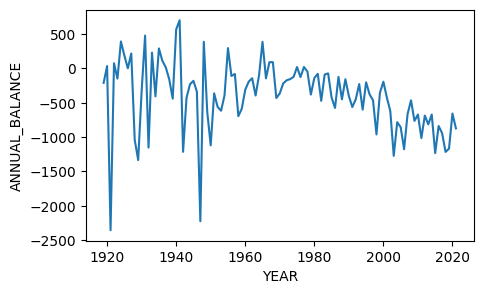

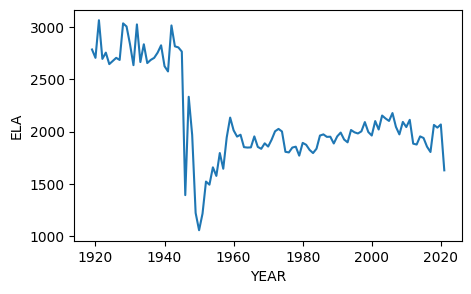

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load time series data
data = pd.read_csv("global glaciermb.csv", parse_dates=['YEAR'], index_col='YEAR')
print(data.columns)

# Visualize time series
plt.figure(figsize=(5,3))
plt.plot(data.ANNUAL_BALANCE)
plt.xlabel('YEAR')
plt.ylabel('ANNUAL_BALANCE')
plt.show()

plt.figure(figsize=(5,3))
plt.plot(data.ELA)
plt.xlabel('YEAR')
plt.ylabel('ELA')
plt.show()

plt.figure(figsize=(5,3))
plt.plot(data.AAR)
plt.xlabel('YEAR')
plt.ylabel('AAR')
plt.show()

In [ ]:
import pandas as pd  
mydata = pd.read_csv("GMSL.csv") 
mydata

YEAR   GMSL  GMSLUncertainty
0    1880 -158.7             24.2
1    1881 -153.1             24.2
2    1882 -169.9             23.0
3    1883 -164.6             22.8
4    1884 -143.7             22.2
..    ...    ...              ...
129  2009   58.0              6.9
130  2010   65.7              7.1
131  2011   67.3              7.5
132  2012   76.1              8.3
133  2013   67.7              8.9

[134 rows x 3 columns]

Index(['GMSL', 'GMSLUncertainty'], dtype='object')


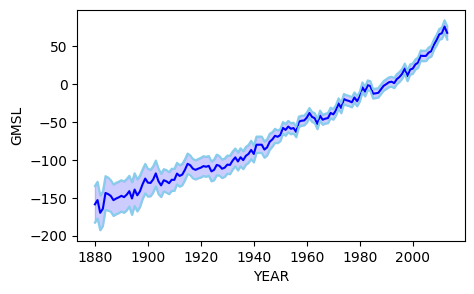

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load time series data
data = pd.read_csv("GMSL.csv", parse_dates=['YEAR'], index_col='YEAR')
print(data.columns)

x=data.index
y1=data.GMSL+data.GMSLUncertainty
y2=data.GMSL-data.GMSLUncertainty

# Visualize time series
plt.figure(figsize=(5,3))
plt.plot(x,data.GMSL,color='blue')
plt.plot(x,y1,color='skyblue')
plt.plot(x,y2,color='skyblue')
plt.fill_between(x, y1, y2, interpolate=True, alpha=0.2, color='blue')
plt.xlabel('YEAR')
plt.ylabel('GMSL')
plt.show()

ARIMA


In [ ]:
from statsmodels.tsa.stattools import adfuller  
from numpy import log 
import pandas as pd   
  
mydata1 = pd.read_csv("global temp.csv")  
  
res = adfuller(mydata1.TempAnomalies.dropna())  
print('Augmented Dickey-Fuller Statistic: %f' % res[0])  
print('p-value: %f' % res[1])  

Augmented Dickey-Fuller Statistic: 1.258119
p-value: 0.996364


In [ ]:
from statsmodels.tsa.stattools import adfuller  
from numpy import log  
import pandas as pd  
  
mydata2 = pd.read_csv("global glaciermb.csv")  
  
res = adfuller(mydata2.ANNUAL_BALANCE.dropna())  
print('Augmented Dickey-Fuller Statistic: %f' % res[0])  
print('p-value: %f' % res[1])  

Augmented Dickey-Fuller Statistic: -2.258625
p-value: 0.185660


In [ ]:
from statsmodels.tsa.stattools import adfuller  
from numpy import log  
import pandas as pd  
  
mydata3 = pd.read_csv("GMSL.csv")  
  
res = adfuller(mydata3.GMSL.dropna())  
print('Augmented Dickey-Fuller Statistic: %f' % res[0])  
print('p-value: %f' % res[1])  

Augmented Dickey-Fuller Statistic: 1.360886
p-value: 0.996929


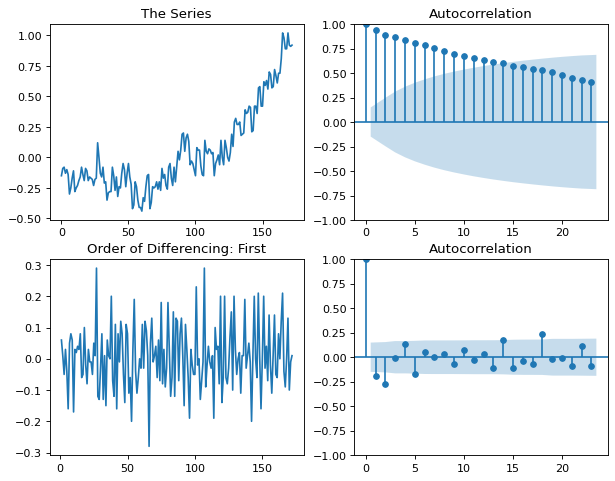

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf  
import matplotlib.pyplot as plt 

plt.rcParams.update({'figure.figsize' : (9,7), 'figure.dpi' :80})  

# The Series  
fig, axes = plt.subplots(2,2)  
axes[0, 0].plot(mydata1.TempAnomalies); 
axes[0, 0].set_title('The Series')  
plot_acf(mydata1.TempAnomalies	, ax = axes[0, 1])  

# Order of Differencing: First  
axes[1, 0].plot(mydata1.TempAnomalies.diff())
axes[1, 0].set_title('Order of Differencing: First')  
plot_acf(mydata1.TempAnomalies.diff().dropna(), ax = axes[1, 1])

plt.show()

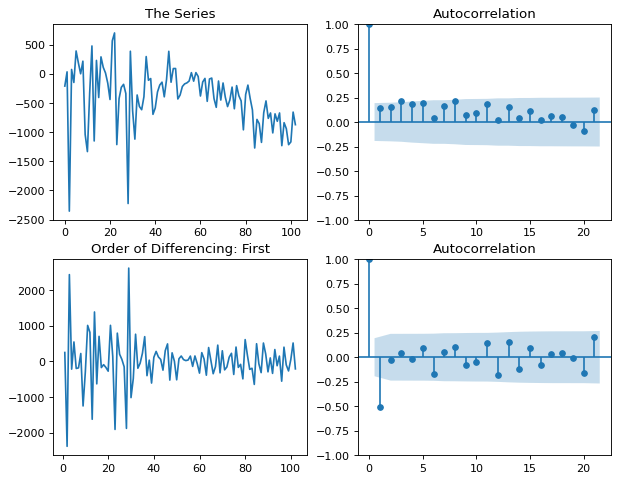

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf  
import matplotlib.pyplot as plt 

plt.rcParams.update({'figure.figsize' : (9,7), 'figure.dpi' :80})  

# The Series  
fig, axes = plt.subplots(2,2)  
axes[0, 0].plot(mydata2.ANNUAL_BALANCE); 
axes[0, 0].set_title('The Series')  
plot_acf(mydata2.ANNUAL_BALANCE, ax = axes[0, 1])  

# Order of Differencing: First  
axes[1, 0].plot(mydata2.ANNUAL_BALANCE.diff())
axes[1, 0].set_title('Order of Differencing: First')  
plot_acf(mydata2.ANNUAL_BALANCE.diff().dropna(), ax = axes[1, 1])

plt.show()

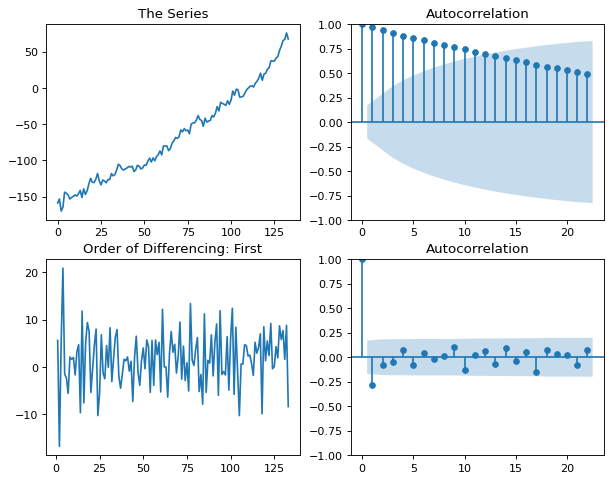

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf  
import matplotlib.pyplot as plt 

plt.rcParams.update({'figure.figsize' : (9,7), 'figure.dpi' :80})  

# The Series  
fig, axes = plt.subplots(2,2)  
axes[0, 0].plot(mydata3.GMSL); 
axes[0, 0].set_title('The Series')  
plot_acf(mydata3.GMSL, ax = axes[0, 1])  

# Order of Differencing: First  
axes[1, 0].plot(mydata3.GMSL.diff())
axes[1, 0].set_title('Order of Differencing: First')  
plot_acf(mydata3.GMSL.diff().dropna(), ax = axes[1, 1])

plt.show()

In [ ]:
import statsmodels.api as sm

# Creating ARIMA model  
mymodel1 = sm.tsa.ARIMA(mydata1.TempAnomalies, order = (2,1,1))  
modelfit1 = mymodel1.fit()  
print(modelfit1.summary())

forecast1 = modelfit1.forecast(steps=10)
print(forecast1)

                               SARIMAX Results                                
Dep. Variable:          TempAnomalies   No. Observations:                  173
Model:                 ARIMA(2, 1, 1)   Log Likelihood                 160.905
Date:                Sun, 23 Apr 2023   AIC                           -313.809
Time:                        16:37:34   BIC                           -301.219
Sample:                             0   HQIC                          -308.701
                                - 173                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1889      0.220      0.858      0.391      -0.242       0.620
ar.L2         -0.2218      0.105     -2.114      0.035      -0.427      -0.016
ma.L1         -0.4861      0.197     -2.464      0.0

In [ ]:
import statsmodels.api as sm

# Creating ARIMA model  
mymodel2 = sm.tsa.ARIMA(mydata2.ANNUAL_BALANCE, order = (2,1,1))  
modelfit2 = mymodel2.fit()  
print(modelfit2.summary())

forecast2 = modelfit2.forecast(steps=10)
print(forecast2)

                               SARIMAX Results                                
Dep. Variable:         ANNUAL_BALANCE   No. Observations:                  103
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -775.649
Date:                Sun, 23 Apr 2023   AIC                           1559.299
Time:                        16:38:43   BIC                           1569.798
Sample:                             0   HQIC                          1563.550
                                - 103                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1060      0.104     -1.022      0.307      -0.309       0.097
ar.L2         -0.0856      0.110     -0.781      0.435      -0.300       0.129
ma.L1         -0.8406      0.082    -10.195      0.0

In [ ]:
import statsmodels.api as sm

# Creating ARIMA model  
mymodel3 = sm.tsa.ARIMA(mydata3.GMSL, order = (2,1,1))  
modelfit3 = mymodel3.fit()  
print(modelfit3.summary())

forecast3 = modelfit3.forecast(steps=10)
print(forecast3)

                               SARIMAX Results                                
Dep. Variable:                   GMSL   No. Observations:                  134
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -424.488
Date:                Sun, 23 Apr 2023   AIC                            856.977
Time:                        16:38:49   BIC                            868.538
Sample:                             0   HQIC                           861.675
                                - 134                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3159      5.976     -0.053      0.958     -12.029      11.397
ar.L2         -0.0401      1.055     -0.038      0.970      -2.108       2.028
ma.L1          0.1352      5.977      0.023      0.9

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


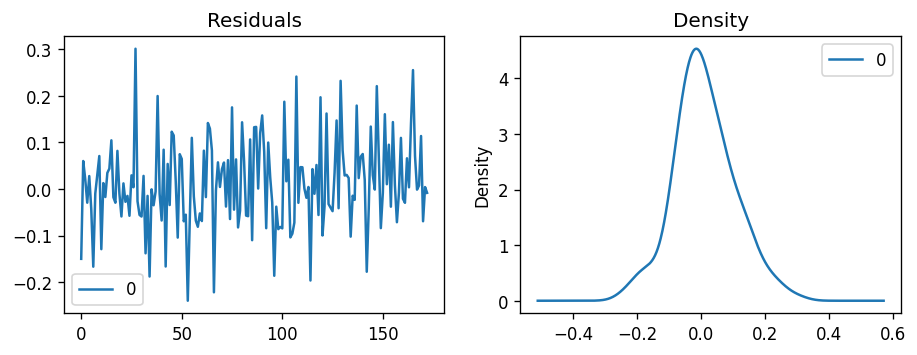

In [ ]:
plt.rcParams.update({'figure.figsize' : (9,3), 'figure.dpi' : 120})  
  
# Plotting Residual Errors  
myresiduals1 = pd.DataFrame(modelfit1.resid)  
fig, ax = plt.subplots(1,2)  
myresiduals1.plot(title = "Residuals", ax = ax[0])  
myresiduals1.plot(kind = 'kde', title = 'Density', ax = ax[1])  
plt.show() 

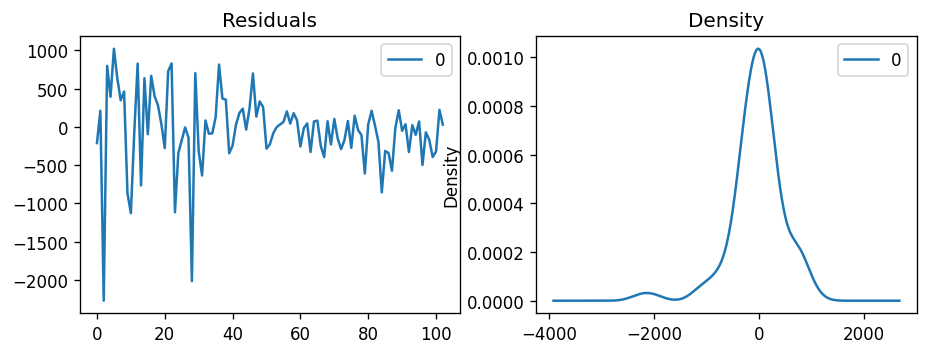

In [ ]:
plt.rcParams.update({'figure.figsize' : (9,3), 'figure.dpi' : 120})  
  
# Plotting Residual Errors  
myresiduals2 = pd.DataFrame(modelfit2.resid)  
fig, ax = plt.subplots(1,2)  
myresiduals2.plot(title = "Residuals", ax = ax[0])  
myresiduals2.plot(kind = 'kde', title = 'Density', ax = ax[1])  
plt.show() 

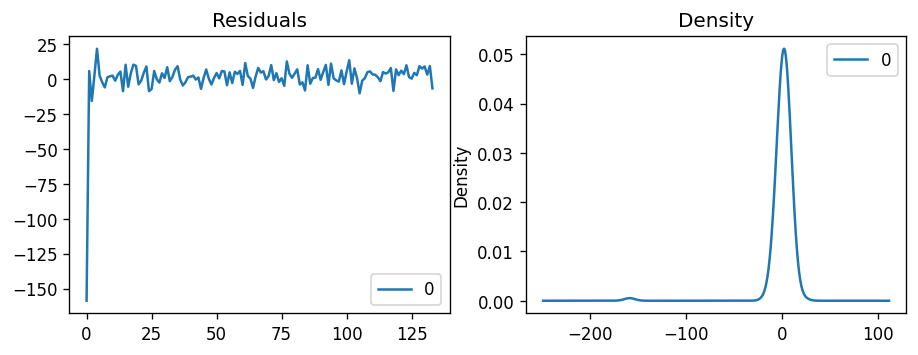

In [ ]:
plt.rcParams.update({'figure.figsize' : (9,3), 'figure.dpi' : 120})  
  
# Plotting Residual Errors  
myresiduals3 = pd.DataFrame(modelfit3.resid)  
fig, ax = plt.subplots(1,2)  
myresiduals3.plot(title = "Residuals", ax = ax[0])  
myresiduals3.plot(kind = 'kde', title = 'Density', ax = ax[1])  
plt.show() 

<ipython-input-31-90fc3330f357>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime
<ipython-input-31-90fc3330f357>:8: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series1 = read_csv("global temp.csv", header=0,usecols=['YEAR', 'TempAnomalies'], index_col=0, squeeze=True)


predicted=0.031480, expected=-0.020000
predicted=-0.005520, expected=0.060000
predicted=0.047667, expected=0.190000
predicted=0.171543, expected=0.200000
predicted=0.202891, expected=0.050000
predicted=0.078405, expected=0.160000
predicted=0.144076, expected=0.190000
predicted=0.189402, expected=0.130000
predicted=0.144411, expected=-0.060000


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


predicted=-0.026813, expected=-0.030000
predicted=-0.033652, expected=-0.050000
predicted=-0.045531, expected=-0.100000
predicted=-0.091133, expected=-0.150000
predicted=-0.141876, expected=0.080000
predicted=0.042261, expected=0.060000
predicted=0.065779, expected=0.060000
predicted=0.062309, expected=-0.070000
predicted=-0.046953, expected=-0.140000
predicted=-0.128808, expected=-0.150000
predicted=-0.148508, expected=0.140000
predicted=0.096589, expected=0.050000
predicted=0.067570, expected=0.030000
predicted=0.035228, expected=0.070000
predicted=0.065461, expected=0.060000
predicted=0.063825, expected=0.030000
predicted=0.036868, expected=0.040000
predicted=0.040181, expected=-0.150000
predicted=-0.117575, expected=-0.050000
predicted=-0.067223, expected=-0.020000
predicted=-0.024111, expected=0.020000
predicted=0.014652, expected=-0.060000
predicted=-0.044829, expected=0.140000
predicted=0.104543, expected=0.000000
predicted=0.030596, expected=-0.060000
predicted=-0.047242, expec

/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.375714, expected=0.570000
predicted=0.533456, expected=0.580000
predicted=0.583932, expected=0.420000
predicted=0.455899, expected=0.420000
predicted=0.424518, expected=0.620000
predicted=0.587474, expected=0.590000
predicted=0.601550, expected=0.630000
predicted=0.628338, expected=0.560000
predicted=0.579131, expected=0.700000
predicted=0.678678, expected=0.680000
predicted=0.690313, expected=0.570000


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.597220, expected=0.580000
predicted=0.583492, expected=0.720000


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.698968, expected=0.670000
predicted=0.686064, expected=0.610000
predicted=0.627406, expected=0.690000
predicted=0.680256, expected=0.690000


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.696109, expected=0.810000
predicted=0.793136, expected=1.020000
predicted=0.990818, expected=0.980000
predicted=0.996584, expected=0.890000
predicted=0.913648, expected=0.890000
predicted=0.897578, expected=1.020000
predicted=1.004605, expected=0.920000
predicted=0.946242, expected=0.910000
predicted=0.919202, expected=0.920000
Test RMSE: 0.104


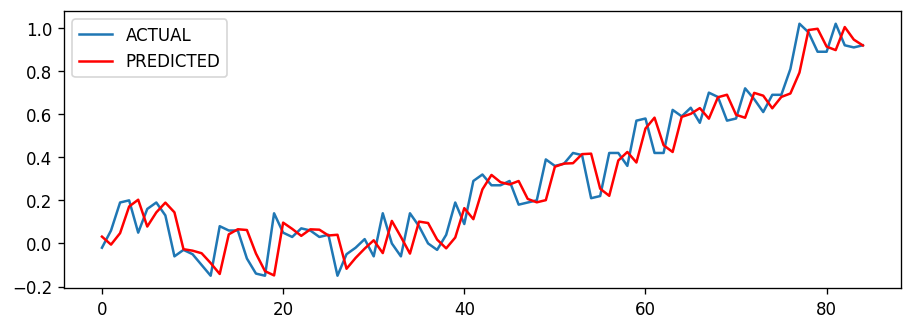

In [ ]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
# load dataset
series1 = read_csv("global temp.csv", header=0,usecols=['YEAR', 'TempAnomalies'], index_col=0, squeeze=True)

# split into train and test sets
X = series1.values
size = int(len(X) * 0.51)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(1,2,1))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
    
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test, label="ACTUAL")
pyplot.plot(predictions, color='red', label="PREDICTED")
plt.legend()
pyplot.show()

<ipython-input-32-5d5205a50d6d>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime
<ipython-input-32-5d5205a50d6d>:8: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series2 = read_csv("global glaciermb.csv", header=0,usecols=['YEAR', 'ANNUAL_BALANCE'], index_col=0, squeeze=True)


predicted=-406.967028, expected=-218.571429
predicted=-297.057499, expected=-173.485714
predicted=-198.906840, expected=-156.485714
predicted=-166.926118, expected=-124.114286
predicted=-141.527868, expected=19.277778
predicted=-51.321648, expected=-126.789474
predicted=-52.442340, expected=20.000000
predicted=-52.479306, expected=-46.625000
predicted=-11.028887, expected=-381.225000
predicted=-216.400853, expected=-141.048780
predicted=-265.662406, expected=-79.375000
predicted=-110.554880, expected=-472.476190
predicted=-279.444851, expected=-89.318182
predicted=-286.629391, expected=-73.510638
predicted=-81.014788, expected=-424.936170
predicted=-251.860689, expected=-575.191489
predicted=-509.112444, expected=-124.148936
predicted=-355.679951, expected=-450.638298
predicted=-290.741917, expected=-157.840000
predicted=-309.619869, expected=-401.176471
predicted=-282.283415, expected=-562.588235
predicted=-489.425110, expected=-449.923077
predicted=-514.958746, expected=-228.192308
p

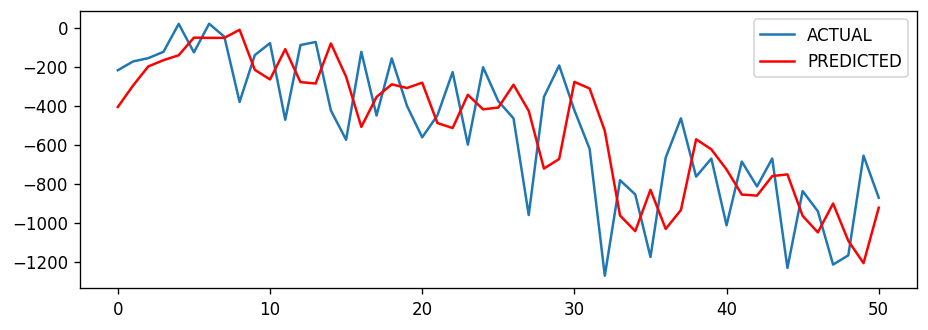

In [ ]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
# load dataset
series2 = read_csv("global glaciermb.csv", header=0,usecols=['YEAR', 'ANNUAL_BALANCE'], index_col=0, squeeze=True)

# split into train and test sets
X = series2.values
size = int(len(X) * 0.51)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(1,2,1))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
    
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test, label="ACTUAL")
pyplot.plot(predictions, color='red', label="PREDICTED")
plt.legend()
pyplot.show()

<ipython-input-33-f896750a42ff>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime
<ipython-input-33-f896750a42ff>:8: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series3 = read_csv("GMSL.csv", header=0,usecols=['YEAR', 'GMSL'], index_col=0, squeeze=True)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


predicted=-72.128424, expected=-68.200000
predicted=-67.622119, expected=-69.500000
predicted=-67.660154, expected=-67.300000
predicted=-66.201247, expected=-57.800000
predicted=-58.112775, expected=-60.400000
predicted=-58.172046, expected=-56.000000
predicted=-55.277690, expected=-58.900000
predicted=-56.591437, expected=-58.000000
predicted=-56.568328, expected=-63.100000
predicted=-60.416860, expected=-49.700000
predicted=-51.313500, expected=-48.300000
predicted=-46.893681, expected=-48.000000
predicted=-46.348589, expected=-44.300000
predicted=-43.418774, expected=-38.100000
predicted=-37.729314, expected=-43.300000
predicted=-40.288461, expected=-44.900000
predicted=-42.846597, expected=-52.800000
predicted=-49.511139, expected=-41.600000
predicted=-42.670894, expected=-47.000000
predicted=-43.954787, expected=-45.600000
predicted=-44.338674, expected=-44.800000
predicted=-43.390195, expected=-38.000000
predicted=-38.071434, expected=-39.900000
predicted=-37.744297, expected=-34

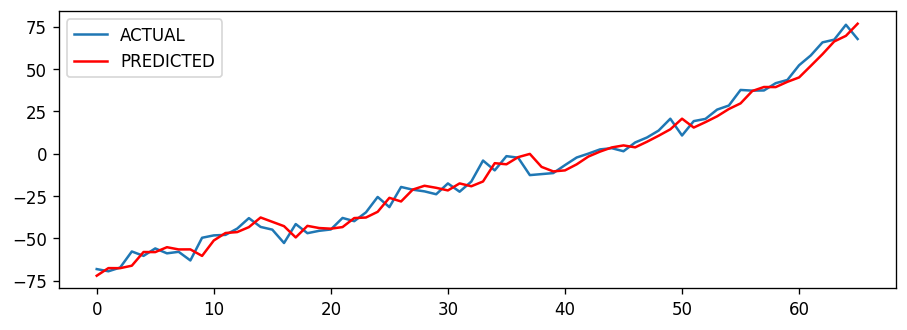

In [ ]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
# load dataset
series3 = read_csv("GMSL.csv", header=0,usecols=['YEAR', 'GMSL'], index_col=0, squeeze=True)

# split into train and test sets
X = series3.values
size = int(len(X) * 0.51)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(1,2,1))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
    
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test, label="ACTUAL")
pyplot.plot(predictions, color='red', label="PREDICTED")
plt.legend()
pyplot.show()

LSTM

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
import math
from sklearn.metrics import mean_squared_error

# create input and output sequences
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back):
        dataX.append(dataset[i:(i+look_back), 0])
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)
    
# load the dataset
dataset1 = pd.read_csv("global temp.csv", usecols=['YEAR', 'TempAnomalies'], parse_dates=['YEAR'], index_col='YEAR')

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset1 = scaler.fit_transform(dataset1)

# split into train and test sets
train_size = int(len(dataset1) * 0.51)
test_size = len(dataset1) - train_size
train, test = dataset1[0:train_size,:], dataset1[train_size:len(dataset1),:]

# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# invert the predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Epoch 1/100
85/85 - 5s - loss: 0.0098 - 5s/epoch - 61ms/step
Epoch 2/100
85/85 - 0s - loss: 0.0046 - 168ms/epoch - 2ms/step
Epoch 3/100
85/85 - 0s - loss: 0.0046 - 166ms/epoch - 2ms/step
Epoch 4/100
85/85 - 0s - loss: 0.0047 - 225ms/epoch - 3ms/step
Epoch 5/100
85/85 - 0s - loss: 0.0046 - 242ms/epoch - 3ms/step
Epoch 6/100
85/85 - 0s - loss: 0.0045 - 230ms/epoch - 3ms/step
Epoch 7/100
85/85 - 0s - loss: 0.0046 - 296ms/epoch - 3ms/step
Epoch 8/100
85/85 - 0s - loss: 0.0046 - 269ms/epoch - 3ms/step
Epoch 9/100
85/85 - 0s - loss: 0.0046 - 290ms/epoch - 3ms/step
Epoch 10/100
85/85 - 0s - loss: 0.0045 - 257ms/epoch - 3ms/step
Epoch 11/100
85/85 - 0s - loss: 0.0045 - 249ms/epoch - 3ms/step
Epoch 12/100
85/85 - 0s - loss: 0.0046 - 248ms/epoch - 3ms/step
Epoch 13/100
85/85 - 0s - loss: 0.0045 - 236ms/epoch - 3ms/step
Epoch 14/100
85/85 - 0s - loss: 0.0045 - 353ms/epoch - 4ms/step
Epoch 15/100
85/85 - 0s - loss: 0.0044 - 427ms/epoch - 5ms/step
Epoch 16/100
85/85 - 1s - loss: 0.0046 - 528ms/epoc

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
import math
from sklearn.metrics import mean_squared_error

# create input and output sequences
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back):
        dataX.append(dataset[i:(i+look_back), 0])
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

# load the dataset
dataset2 = pd.read_csv("global glaciermb.csv", usecols=['YEAR', 'ANNUAL_BALANCE'], parse_dates=['YEAR'], index_col='YEAR')

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset2 = scaler.fit_transform(dataset2)

# split into train and test sets
train_size = int(len(dataset2) * 0.51)
test_size = len(dataset2) - train_size
train, test = dataset2[0:train_size,:], dataset2[train_size:len(dataset2),:]

# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# invert the predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Epoch 1/100
49/49 - 2s - loss: 0.7420 - 2s/epoch - 39ms/step
Epoch 2/100
49/49 - 0s - loss: 0.5027 - 102ms/epoch - 2ms/step
Epoch 3/100
49/49 - 0s - loss: 0.3287 - 102ms/epoch - 2ms/step
Epoch 4/100
49/49 - 0s - loss: 0.1925 - 92ms/epoch - 2ms/step
Epoch 5/100
49/49 - 0s - loss: 0.0989 - 97ms/epoch - 2ms/step
Epoch 6/100
49/49 - 0s - loss: 0.0499 - 106ms/epoch - 2ms/step
Epoch 7/100
49/49 - 0s - loss: 0.0353 - 97ms/epoch - 2ms/step
Epoch 8/100
49/49 - 0s - loss: 0.0331 - 107ms/epoch - 2ms/step
Epoch 9/100
49/49 - 0s - loss: 0.0331 - 149ms/epoch - 3ms/step
Epoch 10/100
49/49 - 0s - loss: 0.0331 - 140ms/epoch - 3ms/step
Epoch 11/100
49/49 - 0s - loss: 0.0333 - 165ms/epoch - 3ms/step
Epoch 12/100
49/49 - 0s - loss: 0.0330 - 148ms/epoch - 3ms/step
Epoch 13/100
49/49 - 0s - loss: 0.0331 - 146ms/epoch - 3ms/step
Epoch 14/100
49/49 - 0s - loss: 0.0328 - 181ms/epoch - 4ms/step
Epoch 15/100
49/49 - 0s - loss: 0.0332 - 172ms/epoch - 4ms/step
Epoch 16/100
49/49 - 0s - loss: 0.0331 - 136ms/epoch -

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
import math
from sklearn.metrics import mean_squared_error

# create input and output sequences
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back):
        dataX.append(dataset[i:(i+look_back), 0])
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

# load the dataset
dataset3 = pd.read_csv("GMSL.csv", usecols=['YEAR', 'GMSL'], parse_dates=['YEAR'], index_col='YEAR')

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset3 = scaler.fit_transform(dataset3)

# split into train and test sets
train_size = int(len(dataset3) * 0.51)
test_size = len(dataset3) - train_size
train, test = dataset3[0:train_size,:], dataset3[train_size:len(dataset3),:]

# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# invert the predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Epoch 1/100
65/65 - 2s - loss: 0.0363 - 2s/epoch - 29ms/step
Epoch 2/100
65/65 - 0s - loss: 0.0093 - 130ms/epoch - 2ms/step
Epoch 3/100
65/65 - 0s - loss: 0.0055 - 129ms/epoch - 2ms/step
Epoch 4/100
65/65 - 0s - loss: 0.0047 - 126ms/epoch - 2ms/step
Epoch 5/100
65/65 - 0s - loss: 0.0041 - 140ms/epoch - 2ms/step
Epoch 6/100
65/65 - 0s - loss: 0.0036 - 140ms/epoch - 2ms/step
Epoch 7/100
65/65 - 0s - loss: 0.0030 - 126ms/epoch - 2ms/step
Epoch 8/100
65/65 - 0s - loss: 0.0025 - 136ms/epoch - 2ms/step
Epoch 9/100
65/65 - 0s - loss: 0.0020 - 155ms/epoch - 2ms/step
Epoch 10/100
65/65 - 0s - loss: 0.0016 - 127ms/epoch - 2ms/step
Epoch 11/100
65/65 - 0s - loss: 0.0013 - 173ms/epoch - 3ms/step
Epoch 12/100
65/65 - 0s - loss: 0.0011 - 140ms/epoch - 2ms/step
Epoch 13/100
65/65 - 0s - loss: 8.5733e-04 - 133ms/epoch - 2ms/step
Epoch 14/100
65/65 - 0s - loss: 7.7240e-04 - 121ms/epoch - 2ms/step
Epoch 15/100
65/65 - 0s - loss: 6.5308e-04 - 136ms/epoch - 2ms/step
Epoch 16/100
65/65 - 0s - loss: 6.4245e

VAR

In [ ]:
import pandas as pd
from statsmodels.tsa.api import VAR

# load data
data1 = pd.read_csv("global temp.csv", usecols=['YEAR', 'TempAnomalies'])

# create VAR model with 2 lags
model = VAR(data1[['YEAR', 'TempAnomalies']])
results = model.fit(10)

# predict next 10 periods
predictions = results.forecast(data1.values[-10:], steps=10)

# print predictions
print(predictions)

[[2.02400000e+03 9.71070804e-01]
 [2.02500000e+03 9.74081981e-01]
 [2.02600000e+03 1.02278019e+00]
 [2.02700000e+03 1.03663266e+00]
 [2.02800000e+03 1.05848445e+00]
 [2.02900000e+03 1.05913218e+00]
 [2.03000000e+03 1.09007773e+00]
 [2.03100000e+03 1.09805619e+00]
 [2.03200000e+03 1.11503513e+00]
 [2.03300000e+03 1.12610598e+00]]


In [ ]:
import pandas as pd
from statsmodels.tsa.api import VAR

# load data
data2 = pd.read_csv("global glaciermb.csv", usecols=['YEAR', 'ANNUAL_BALANCE'])

# create VAR model with 2 lags
model = VAR(data2[['YEAR', 'ANNUAL_BALANCE']])
results = model.fit(10)

# predict next 10 periods
predictions = results.forecast(data2.values[-10:], steps=10)

# print predictions
print(predictions)

[[2022.         -928.31880756]
 [2023.         -946.39148845]
 [2024.         -834.66809641]
 [2025.         -836.64811893]
 [2026.         -951.10511869]
 [2027.         -945.12654451]
 [2028.         -856.73660517]
 [2029.         -889.09019218]
 [2030.         -917.17265794]
 [2031.         -927.6894511 ]]


In [ ]:
import pandas as pd
from statsmodels.tsa.api import VAR

# load data
data3 = pd.read_csv("GMSL.csv", usecols=['YEAR', 'GMSL'])

# create VAR model with 2 lags
model = VAR(data3[['YEAR', 'GMSL']])
results = model.fit(10)

# predict next 10 periods
predictions = results.forecast(data3.values[-10:], steps=10)

# print predictions
print(predictions)

[[2014.           72.48469047]
 [2015.           74.462979  ]
 [2016.           78.14568003]
 [2017.           80.45651373]
 [2018.           85.19272937]
 [2019.           87.75875813]
 [2020.           90.56038363]
 [2021.           93.63759048]
 [2022.           95.12389942]
 [2023.           98.33407473]]


LAND SUBMERGE ANALYSIS

In [ ]:
import pandas as pd

data=pd.read_csv("/dataset.csv")
data.head()

S.No      Country Continent LandArea Coastal_length  Year   sea level  \
0     1  afghanistan      Asia  652,860              0  1880 -174.320729   
1     2  afghanistan      Asia  652,860              0  1890 -162.654063   
2     3  afghanistan      Asia  652,860              0  1900 -150.394062   
3     4  afghanistan      Asia  652,860              0  1910 -138.367396   
4     5  afghanistan      Asia  652,860              0  1920 -130.934063   

   Temperaturecountrywise  Land Impact(m/decade)  
0               12.293500                    0.0  
1               13.757808                    0.0  
2               13.708317                    0.0  
3               13.881050                    0.0  
4               13.716350                    0.0

In [ ]:
data.describe()

S.No       Year    sea level  Temperaturecountrywise  \
count  2820.000000  2820.0000  2820.000000             2727.000000   
mean   1448.558511  1950.0000   -72.893169               18.976461   
std     838.718698    43.2126    74.380559                8.268181   
min       1.000000  1880.0000  -174.320729               -7.903357   
25%     720.750000  1910.0000  -138.367396               11.430828   
50%    1440.500000  1950.0000   -80.700729               22.566000   
75%    2175.250000  1990.0000   -14.790729               25.965183   
max    2910.000000  2020.0000    66.704325               29.807551   

       Land Impact(m/decade)  
count            2820.000000  
mean             1369.276358  
std              8872.201872  
min                -9.918200  
25%                 0.000000  
50%                 7.517000  
75%                41.237850  
max             94117.990000

In [ ]:
data['Coastal_length'] = data['Coastal_length'].str.replace(' km', '')
data['Coastal_length'] = data['Coastal_length'].str.replace('K', '000')
data['Coastal_length'] = data['Coastal_length'].str.replace('k', '000')
data['Coastal_length'] = data['Coastal_length'].str.replace(',', '')
data['Coastal_length'] = data['Coastal_length'].str.replace('.', '').astype("int")

<ipython-input-5-b847ce70fc39>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Coastal_length'] = data['Coastal_length'].str.replace('.', '').astype("int")


In [ ]:
data['LandArea']=data['LandArea'].str.replace(",","").astype("int")

In [ ]:
data.isnull().sum()

S.No                       0
Country                    0
Continent                  0
LandArea                   0
Coastal_length             0
Year                       0
sea level                  0
Temperaturecountrywise    93
Land Impact(m/decade)      0
dtype: int64

In [ ]:
data.dtypes

S.No                        int64
Country                    object
Continent                  object
LandArea                    int64
Coastal_length              int64
Year                        int64
sea level                 float64
Temperaturecountrywise    float64
Land Impact(m/decade)     float64
dtype: object

In [ ]:
glacier=pd.read_csv("/content/global glaciermb.csv")
glacier

YEAR  ANNUAL_BALANCE          ELA        AAR
0    1919     -211.000000  2785.000000  45.000000
1    1920       33.000000  2705.000000  64.000000
2    1921    -2354.000000  3065.000000   0.000000
3    1922       74.000000  2695.000000  67.000000
4    1923     -149.000000  2755.000000  51.000000
..    ...             ...          ...        ...
98   2017     -941.836735  1804.163265  29.975000
99   2018    -1215.183673  2063.122449  22.024390
100  2019    -1167.880000  2037.360000  23.300000
101  2020     -656.775510  2067.530612  32.300000
102  2021     -872.500000  1628.789474  26.857143

[103 rows x 4 columns]

In [ ]:
bins = [i for i in range(1910,2031,10)]
labels = [i for i in range(1910,2021,10)]
glacier['YEAR'] = pd.cut(glacier['YEAR'], bins=bins, labels=labels)
print(glacier)

     YEAR  ANNUAL_BALANCE          ELA        AAR
0    1910     -211.000000  2785.000000  45.000000
1    1910       33.000000  2705.000000  64.000000
2    1920    -2354.000000  3065.000000   0.000000
3    1920       74.000000  2695.000000  67.000000
4    1920     -149.000000  2755.000000  51.000000
..    ...             ...          ...        ...
98   2010     -941.836735  1804.163265  29.975000
99   2010    -1215.183673  2063.122449  22.024390
100  2010    -1167.880000  2037.360000  23.300000
101  2010     -656.775510  2067.530612  32.300000
102  2020     -872.500000  1628.789474  26.857143

[103 rows x 4 columns]


In [ ]:
glacier=glacier.groupby('YEAR').mean()
glacier

ANNUAL_BALANCE          ELA        AAR
YEAR                                        
1910      -89.000000  2745.000000  54.500000
1920     -433.900000  2810.000000  43.400000
1930      -47.500000  2741.000000  55.600000
1940     -528.533333  2194.350000  42.600000
1950     -342.568355  1698.798098  48.989704
1960     -120.785417  1885.132292  55.357894
1970     -132.906762  1891.871379  52.735667
1980     -284.861137  1900.042163  48.647912
1990     -439.661852  1984.838855  44.837282
2000     -769.887645  2082.736484  34.629213
2010     -923.870581  1959.070300  29.107210
2020     -872.500000  1628.789474  26.857143

In [ ]:
data=data.rename(columns={'Year':'YEAR'})

In [ ]:
new_data = pd.merge(data,glacier, on='YEAR', how='left')

In [ ]:
new_data

S.No      Country Continent  LandArea  Coastal_length  YEAR   sea level  \
0        1  afghanistan      Asia    652860               0  1880 -174.320729   
1        2  afghanistan      Asia    652860               0  1890 -162.654063   
2        3  afghanistan      Asia    652860               0  1900 -150.394062   
3        4  afghanistan      Asia    652860               0  1910 -138.367396   
4        5  afghanistan      Asia    652860               0  1920 -130.934063   
...    ...          ...       ...       ...             ...   ...         ...   
2815  2906     zimbabwe    Africa    386850               0  1980  -30.914062   
2816  2907     zimbabwe    Africa    386850               0  1990  -14.790729   
2817  2908     zimbabwe    Africa    386850               0  2000   14.662604   
2818  2909     zimbabwe    Africa    386850               0  2010   48.960947   
2819  2910     zimbabwe    Africa    386850               0  2020   66.704325   

      Temperaturecountrywise  Land Impact(m/decade)  ANNUAL_BALANCE  \
0                  12.293500                    0.0             NaN   
1                  13.757808                    0.0             NaN   
2                  13.708317                    0.0             NaN   
3                  13.881050                    0.0      -89.000000   
4                  13.716350                    0.0     -433.900000   
...                      ...                    ...             ...   
2815               21.804792                    0.0     -284.861137   
2816               21.786892                    0.0     -439.661852   
2817               21.852425                    0.0     -769.887645   
2818               21.908262                    0.0     -923.870581   
2819               21.982873                    0.0     -872.500000   

              ELA        AAR  
0             NaN        NaN  
1             NaN        NaN  
2             NaN        NaN  
3     2745.000000  54.500000  
4     2810.000000  43.400000  
...           ...        ...  
2815  1900.042163  48.647912  
2816  1984.838855  44.837282  
2817  2082.736484  34.629213  
2818  1959.070300  29.107210  
2819  1628.789474  26.857143  

[2820 rows x 12 columns]

In [ ]:
new_data=new_data.drop(['ELA','AAR'], axis=1)

In [ ]:
new_data.columns

Index(['S.No', 'Country', 'Continent', 'LandArea', 'Coastal_length', 'YEAR',
       'sea level', 'Temperaturecountrywise', 'Land Impact(m/decade)',
       'ANNUAL_BALANCE'],
      dtype='object')

In [ ]:
new_data = new_data.reindex(columns=['S.No', 'Country', 'Continent', 'LandArea', 'Coastal_length', 'YEAR', 'Temperaturecountrywise','ANNUAL_BALANCE','sea level', 'Land Impact(m/decade)'])

In [ ]:
new_data

S.No      Country Continent  LandArea  Coastal_length  YEAR  \
0        1  afghanistan      Asia    652860               0  1880   
1        2  afghanistan      Asia    652860               0  1890   
2        3  afghanistan      Asia    652860               0  1900   
3        4  afghanistan      Asia    652860               0  1910   
4        5  afghanistan      Asia    652860               0  1920   
...    ...          ...       ...       ...             ...   ...   
2815  2906     zimbabwe    Africa    386850               0  1980   
2816  2907     zimbabwe    Africa    386850               0  1990   
2817  2908     zimbabwe    Africa    386850               0  2000   
2818  2909     zimbabwe    Africa    386850               0  2010   
2819  2910     zimbabwe    Africa    386850               0  2020   

      Temperaturecountrywise  ANNUAL_BALANCE   sea level  \
0                  12.293500             NaN -174.320729   
1                  13.757808             NaN -162.654063   
2                  13.708317             NaN -150.394062   
3                  13.881050      -89.000000 -138.367396   
4                  13.716350     -433.900000 -130.934063   
...                      ...             ...         ...   
2815               21.804792     -284.861137  -30.914062   
2816               21.786892     -439.661852  -14.790729   
2817               21.852425     -769.887645   14.662604   
2818               21.908262     -923.870581   48.960947   
2819               21.982873     -872.500000   66.704325   

      Land Impact(m/decade)  
0                       0.0  
1                       0.0  
2                       0.0  
3                       0.0  
4                       0.0  
...                     ...  
2815                    0.0  
2816                    0.0  
2817                    0.0  
2818                    0.0  
2819                    0.0  

[2820 rows x 10 columns]

In [ ]:
new_data.to_csv("land submerged.csv",index=False)

In [ ]:
from google.colab import files
files.view('land submerged.csv')


<IPython.core.display.Javascript object>

In [ ]:
ls_data=pd.read_csv("/land submerged.csv")

In [ ]:
ls_data[ls_data.isnull().any(axis=1)]

S.No   Country      Continent  LandArea  Coastal_length  YEAR  \
1064  1095     haiti  North America     27560            2000  2020   
1065  1096  holy see         Europe         0               0  1880   
1066  1097  holy see         Europe         0               0  1890   
1067  1098  holy see         Europe         0               0  1900   
1068  1099  holy see         Europe         0               0  1910   
...    ...       ...            ...       ...             ...   ...   
2635  2711    tuvalu      Australia        30              34  1980   
2636  2712    tuvalu      Australia        30              35  1990   
2637  2713    tuvalu      Australia        30              36  2000   
2638  2714    tuvalu      Australia        30              37  2010   
2639  2715    tuvalu      Australia        30              38  2020   

      Temperaturecountrywise  ANNUAL_BALANCE   sea level  \
1064                     NaN     -872.500000   66.704325   
1065                     NaN        0.000000 -174.320729   
1066                     NaN        0.000000 -162.654063   
1067                     NaN        0.000000 -150.394062   
1068                     NaN      -89.000000 -138.367396   
...                      ...             ...         ...   
2635                     NaN     -284.861137  -30.914062   
2636                     NaN     -439.661852  -14.790729   
2637                     NaN     -769.887645   14.662604   
2638                     NaN     -923.870581   48.960947   
2639                     NaN     -872.500000   66.704325   

      Land Impact(m/decade)  
1064              268.00500  
1065                0.00000  
1066                0.00000  
1067                0.00000  
1068                0.00000  
...                     ...  
2635                4.19293  
2636                5.92390  
2637                5.92981  
2638                6.18238  
2639                6.27283  

[93 rows x 10 columns]

In [ ]:
ls_data=pd.read_csv("/land submerged.csv")
ls_data.isnull().sum()

S.No                        0
Country                     0
Continent                   0
LandArea                    0
Coastal_length              0
YEAR                        0
Temperaturecountrywise      0
ANNUAL_BALANCE            564
sea level                   0
Land Impact(m/decade)       0
dtype: int64

In [ ]:
ls_data['ANNUAL_BALANCE']=ls_data['ANNUAL_BALANCE'].fillna(0)
ls_data.isnull().sum()

S.No                      0
Country                   0
Continent                 0
LandArea                  0
Coastal_length            0
YEAR                      0
Temperaturecountrywise    0
ANNUAL_BALANCE            0
sea level                 0
Land Impact(m/decade)     0
dtype: int64

In [ ]:
ls_data.to_csv("land submerged.csv",index=False)

In [ ]:
from google.colab import files
files.view('land submerged.csv')

<IPython.core.display.Javascript object>

In [ ]:
ls=pd.read_csv("/land submerged.csv")
ls.head()

S.No      Country Continent  LandArea  Coastal_length  YEAR  \
0     1  afghanistan      Asia    652860               0  1880   
1     2  afghanistan      Asia    652860               0  1890   
2     3  afghanistan      Asia    652860               0  1900   
3     4  afghanistan      Asia    652860               0  1910   
4     5  afghanistan      Asia    652860               0  1920   

   Temperaturecountrywise  ANNUAL_BALANCE   sea level  Land Impact(m/decade)  
0               12.293500             0.0 -174.320729                    0.0  
1               13.757808             0.0 -162.654063                    0.0  
2               13.708317             0.0 -150.394062                    0.0  
3               13.881050           -89.0 -138.367396                    0.0  
4               13.716350          -433.9 -130.934063                    0.0

In [ ]:
ls.isnull().sum()

S.No                      0
Country                   0
Continent                 0
LandArea                  0
Coastal_length            0
YEAR                      0
Temperaturecountrywise    0
ANNUAL_BALANCE            0
sea level                 0
Land Impact(m/decade)     0
dtype: int64

In [ ]:
ls.dtypes

S.No                        int64
Country                    object
Continent                  object
LandArea                    int64
Coastal_length              int64
YEAR                        int64
Temperaturecountrywise    float64
ANNUAL_BALANCE            float64
sea level                 float64
Land Impact(m/decade)     float64
dtype: object

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
country_name=input("Enter country name : ")

Enter country name : norway


In [ ]:
df=ls[ls['Country']==country_name]
df

S.No Country Continent  LandArea  Coastal_length  YEAR  \
1875  1936  norway    Europe    365268          532000  1880   
1876  1937  norway    Europe    365268          532000  1890   
1877  1938  norway    Europe    365268          532000  1900   
1878  1939  norway    Europe    365268          532000  1910   
1879  1940  norway    Europe    365268          532000  1920   
1880  1941  norway    Europe    365268          532000  1930   
1881  1942  norway    Europe    365268          532000  1940   
1882  1943  norway    Europe    365268          532000  1950   
1883  1944  norway    Europe    365268          532000  1960   
1884  1945  norway    Europe    365268          532000  1970   
1885  1946  norway    Europe    365268          532000  1980   
1886  1947  norway    Europe    365268          532000  1990   
1887  1948  norway    Europe    365268          532000  2000   
1888  1949  norway    Europe    365268          532000  2010   
1889  1950  norway    Europe    365268          532000  2020   

      Temperaturecountrywise  ANNUAL_BALANCE   sea level  \
1875                0.052317        0.000000 -174.320729   
1876               -0.167933        0.000000 -162.654063   
1877               -0.081325        0.000000 -150.394062   
1878               -0.008750      -89.000000 -138.367396   
1879                0.156750     -433.900000 -130.934063   
1880                0.870917      -47.500000 -120.800729   
1881                0.564900     -528.533333 -102.664062   
1882                0.534175     -342.568355  -80.700729   
1883               -0.190050     -120.785417  -67.524062   
1884                0.354467     -132.906762  -49.660729   
1885                0.566025     -284.861137  -30.914062   
1886                0.845108     -439.661852  -14.790729   
1887                0.979685     -769.887645   14.662604   
1888                1.920373     -923.870581   48.960947   
1889                2.700000     -872.500000   66.704325   

      Land Impact(m/decade)  
1875               0.005200  
1876               0.005420  
1877               0.005450  
1878               0.006200  
1879               0.005984  
1880               0.006178  
1881               0.006123  
1882               0.006320  
1883               0.006412  
1884               0.072290  
1885               0.078290  
1886               0.083920  
1887               0.091890  
1888               0.106200  
1889               0.124930

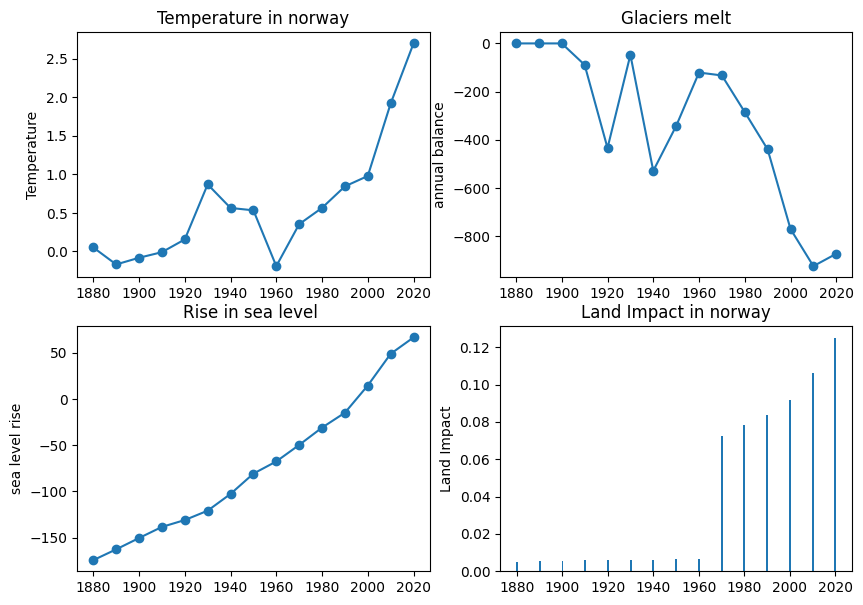

In [ ]:
plt.figure(figsize=(10,7))

plt.subplot(2, 2, 1) 
plt.plot(df['YEAR'],df['Temperaturecountrywise'],marker='o')
plt.ylabel('Temperature')
plt.title('Temperature in '+country_name)

plt.subplot(2, 2, 2) 
plt.plot(df['YEAR'],df['ANNUAL_BALANCE'],marker='o')
plt.ylabel('annual balance')
plt.title('Glaciers melt')

plt.subplot(2, 2, 3) 
plt.plot(df['YEAR'],df['sea level'],marker='o')
plt.ylabel('sea level rise')
plt.title('Rise in sea level ')

plt.subplot(2, 2, 4) 
plt.bar(df['YEAR'],df['Land Impact(m/decade)'])
plt.ylabel('Land Impact')
plt.title('Land Impact in '+country_name)

plt.show()

In [ ]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# split into train and test sets
X = ls.values
size = int(len(X) * 0.51)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(1,2,1))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
    
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test, label="ACTUAL")
pyplot.plot(predictions, color='red', label="PREDICTED")
plt.legend()
pyplot.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
df = pd.read_csv('C:\\Users\\ragia\\OneDrive\\Desktop\\dsr datasets\\dsrdataset.csv')
df

In [ ]:
df['date'] = pd.to_datetime(df['Year'].astype(str), format='%Y')  # convert year column to datetime
df = df.set_index('date')  # set date column as index

In [ ]:
df = df.drop(['LandAverageTemperatureUncertainty','LandMaxTemperature','LandMaxTemperatureUncertainty','LandMinTemperature','LandMinTemperatureUncerainty','GMSLUncertainty'],axis=1)
print(df)

In [ ]:
corr = df[['LandAverageTemperature', 'GMSL']].corr().iloc[0, 1]
print(f"Correlation coefficient: {corr:.2f}")


In [ ]:
model = ARIMA(df['GMSL'], order=(1, 0, 1), exog=df[['LandAverageTemperature']])
results = model.fit()

In [ ]:
start_index = '1881'
end_index = '1979'
pred = results.predict(start=start_index, end=end_index, exog=df.loc[start_index:end_index, ['LandAverageTemperature']])


In [ ]:
pred

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(actual, color='blue', label='Actual')
ax.plot( pred, color='orange', label='Predicted')
# ax.hist(actual, bins=20, alpha=0.5, label='Actual')
# ax.hist(pred.values, bins=20, alpha=0.5, label='Predicted')
ax.legend()
ax.set_title('Actual vs Predicted GMSL')
ax.set_xlabel('Year')
ax.set_ylabel('GMSL (mm)')
plt.show()

Temperature vs Glaciers Analysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
df = pd.read_csv("C:\\Users\\ragia\\Downloads\\temp_vs_glaciermb.csv")
df

In [ ]:
df['date'] = pd.to_datetime(df['YEAR'].astype(str), format='%Y')  # convert year column to datetime
df = df.set_index('date') 

In [ ]:
df = df.drop(['LandTempAaomalies','OceanTempAnomalies','ELA','AAR'],axis=1)
print(df)

In [ ]:
corr = df[['TempAnomalies', 'ANNUAL_BALANCE']].corr().iloc[0, 1]
print(f"Correlation coefficient: {corr:.2f}")

In [ ]:
model = ARIMA(df['ANNUAL_BALANCE'], order=(0, 0, 0), exog=df[['TempAnomalies']])
results = model.fit()

In [ ]:
fig, ax = plt.subplots()
ax.plot(df.index, results.resid)
ax.set_title('Residuals')
plt.show()

In [ ]:
train_size = 0.7
train, test = train_test_split(df, train_size=train_size, shuffle=False)

In [ ]:
start_index = '1920'
end_index = '2000'
pred = results.predict(start=start_index, end=end_index, exog=df.loc[start_index:end_index, ['TempAnomalies']])
pred

In [ ]:
actual = df['ANNUAL_BALANCE'][1:82]
actual

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(pred, color='blue', label='pred')
ax.plot(actual, color='green', label='Actual')
ax.legend()
ax.set_title('Actual vs Predicted annual balance')
ax.set_xlabel('Year')
ax.set_ylabel('Annual balance (mm)')
plt.show()

In [ ]:
#glaciers vs sea level

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA


In [ ]:
df = pd.read_csv("C:\\Users\\ragia\\Downloads\\glaciermb_vs_slr.csv")
# df

In [ ]:
df = df.drop(['GMSLUncertainty','ELA','AAR'],axis=1)
# print(df)

In [ ]:
df = df.set_index('YEAR')
# df

In [ ]:
train_size = int(len(df) * 0.7)
train, test = df.iloc[:train_size], df.iloc[train_size:]


In [ ]:
model = ARIMA(train['ANNUAL_BALANCE'], exog=train['GMSL'], order=(2, 0, 1))
results = model.fit()


In [ ]:
preds = results.forecast(steps=len(test), exog=test['ANNUAL_BALANCE'])
actual=test['ANNUAL_BALANCE']

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(test.index, test['ANNUAL_BALANCE'], color='blue', label='Actual')
ax.plot(test.index, preds, color='orange', label='Predicted')
ax.legend()
ax.set_title('Actual vs Predicted GMSL')
ax.set_xlabel('Year')
ax.set_ylabel('Annual balance (mm)')
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
slr = pd.read_csv(r"C:\Users\ADMIN\Downloads\Glacier\analysis\GMSL.csv")
gmb = pd.read_csv(r"C:\Users\ADMIN\Downloads\Glacier\analysis\mass_balance.csv")

In [ ]:
slr.head()

In [ ]:
slr = slr.rename(columns={"Year":"YEAR"})
slr.columns

In [ ]:
slr.dtypes

In [ ]:
gmb.head()

In [ ]:
gmb.columns

In [ ]:
global_gmb = gmb.drop(['PU', 'NAME', 'LATITUDE', 'LONGITUDE'],axis=1)
global_gmb.head()

In [ ]:
global_gmb.dtypes

In [ ]:
global_gmb["YEAR"] = global_gmb["YEAR"].apply(lambda x:x[-4:])
global_gmb["YEAR"]

In [ ]:
global_gmb.isnull().sum()

In [ ]:
global_gmb.dtypes

In [ ]:
l=list(map(str,global_gmb["ELA"]))
for i in range(len(l)):
    if l[i][0]=='<' or l[i][0]=='>':
        l[i]=l[i][1:]
    if l[i]=="nan":
        l[i]=0
global_gmb["ELA"]=l
global_gmb.head()

In [ ]:
global_gmb["ELA"]=global_gmb["ELA"].astype("int64")

In [ ]:
global_gmb.dtypes

In [ ]:
gg=global_gmb.groupby("YEAR").mean()
df=pd.DataFrame(gg)
df

In [ ]:
gg = gg.reset_index()
gg

In [ ]:
gg["YEAR"] = gg["YEAR"].astype("int64")
gg.dtypes

In [ ]:
gg.to_csv("global glaciermb.csv",index=False)

In [ ]:
df = pd.merge(gg,slr,how="left",on="YEAR")
df

In [ ]:
df.isnull().sum()

In [ ]:
df = df.dropna()
df

In [ ]:
df.head(10)

In [ ]:
df.to_csv("glaciermb_vs_slr.csv",index=False)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
temp = pd.read_csv(r"C:\Users\ADMIN\Downloads\Glacier\analysis\global temp.csv")
print(temp)
glacier = pd.read_csv(r"C:\Users\ADMIN\Downloads\Glacier\analysis\global glaciermb.csv")
print(glacier)

In [ ]:
df = pd.merge(temp,glacier,how="right",on="YEAR")
df

In [ ]:
df.to_csv("temp_vs_glaciermb.csv",index=False)

In [44]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Load the dataset
data = pd.read_excel('land submerged.xlsx')
data.columns

Index(['S.No', 'Country', 'Continent', 'LandArea', 'Coastal_length', 'YEAR',
       'Temperaturecountrywise', 'ANNUAL_BALANCE', 'sea level',
       'Land Impact(m/decade)'],
      dtype='object')

In [45]:
data.isnull().sum()

S.No                        0
Country                     0
Continent                   0
LandArea                    0
Coastal_length              0
YEAR                        0
Temperaturecountrywise      0
ANNUAL_BALANCE            564
sea level                   0
Land Impact(m/decade)       0
dtype: int64

In [46]:
data['ANNUAL_BALANCE']=data['ANNUAL_BALANCE'].fillna(0)

In [47]:
data.isnull().sum()

S.No                      0
Country                   0
Continent                 0
LandArea                  0
Coastal_length            0
YEAR                      0
Temperaturecountrywise    0
ANNUAL_BALANCE            0
sea level                 0
Land Impact(m/decade)     0
dtype: int64

In [87]:
countries=data['Country'].unique()
print(len(countries))
print(data.shape)

188
(2820, 10)


In [107]:
ls=pd.DataFrame()
ls['Country']=[]
ls['Score']=[]
ls['Coefficients']=[]
ls['Intercept']=[]
# ls['y_test']=[]
# ls['y_pred']=[]
ls['RMSE']=[]

def multilinear_model(country_name,X,y):

  X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1)
  model = LinearRegression()
  model.fit(X_train, y_train)
  y_pred=model.predict(X_test)

  d={'Country':country_name,
      'Score':model.score(X_test,y_test),
      'Coefficients':model.coef_,
      'Intercept':model.intercept_,
      'RMSE':metrics.mean_squared_error(y_test,y_pred)}
  # ls['y_test']=y_test
  # ls['y_pred']=y_pred
  ls=ls.append(d,ignore_index=True)


for country_name in countries:
  df=data[data['Country']==country_name]
  X = df.loc[:,['Temperaturecountrywise', 'ANNUAL_BALANCE', 'sea level']]
  y = df['Land Impact(m/decade)']
  multilinear_model(country_name,X,y)

UnboundLocalError: ignored

In [105]:
ls

Country  Score  Coefficients  Intercept  RMSE
0  zimbabwe    1.0           0.0        0.0   0.0
1  zimbabwe    1.0           0.0        0.0   0.0
2  zimbabwe    1.0           0.0        0.0   0.0